# Lab 6.1: Simple Linear Regression

**Question 1**  

The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lab6_1_q4.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

(b) Describe the relationship between volume and diameter of these trees.  

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

In [1]:
#Diameter in inches is better, less variance for every x point 

**Question 2**  

The Coast Starlight Amtrak train runs from Seattle to Los Angeles.  

The mean travel time from one stop to the next on the Coast Starlight is 129 mins, with a standard deviation of 113 minutes. The mean distance traveled from one stop to the next is 108 miles with a standard deviation of 99 miles. The correlation between travel time and distance is 0.636.  

(a) Write the equation of the regression line for predicting travel time.  

In [9]:
# y= distance
# x = time
#sy = 99
#mean (Y) = 108
# b1 = Sy / Sx * Rxy
# b_o = mean(y) - b1*mean(x)
# Rxy = .636
b1 = 99/113*.636
bo = 108 -b1*129

print(b1,'distance/time', bo, '= distance at time of 0')

def distance(time): return (36.12 + .56*(time))

0.5572035398230089 distance/time 36.12074336283186 = distance at time of 0


(b) Interpret the slope and the intercept in this context.  

##### intercept = At time zero, we have traveled 36.12 miles. We know this is not possible, but this is where time =0 
#### intercepts the y-axis.
#### slope = for every minute that we spend traveling, we expect to traverse .557 miles. 

(c) Calculate $R^2$ of the regression line for predicting travel time from distance traveled for the Coast Starlight, and interpret $R^2$ in the context of the application.  

In [6]:
# R^2 = SSregression / SStotal
#SStotal = SSresidual + SS regression

r_squarred =  0.636**2
r_squarred



0.404496

- The r^2 value of .40 implies that 40.4% of the variance of y (distance) can be explained by x (time). 

(d) The distance between Santa Barbara and Los Angeles is 103 miles. Use the model to estimate the time it takes for the Starlight to travel between these two cities.  

In [17]:
#103 = 36.12 + .56*(time)
(103-36.12)/.56

# It will take approximately 119 minutes, or about 2 hours.

119.4285714285714

(e) It actually takes the Coast Starlight about 168 mins to travel from Santa Barbara to Los Angeles. Calculate the residual and explain the meaning of this residual value.  

In [20]:
(168-119.43)

48.56999999999999

In [21]:
# This is the residual which corresponds to the time (in minutes) for our actual data - our predicted 
# values. This is the distance above the regression line for an x-value of 103 miles. 

(f) Suppose Amtrak is considering adding a stop to the Coast Starlight 500 miles away from Los Angeles. Would it be appropriate to use this linear model to predict the travel time from Los Angeles to this point?  

# No because our model doesn't take into account distances outside of Seattle to Los Angeles. 
# This would be extrapolating outside of our model's capabilities. 

**Question 3**

You are given data about students' test results and the number of hours they study below:

```
Test results:    30, 45, 85, 100
Hours of study:  5,  7 , 10, 70
```

1) We will use the following model to predict the test results based on the number of hours a student studies:
   
   $\text{test result} = \beta_0 + \beta_1 \text{number of hours} ＋ \varepsilon$
   
   Explain what $\beta_0$ represents in the model. 
   

   

# Bo represents the expected test if we don't study at all! 

2) Using the oridinary least square approach, find $b_0$ ($\hat{\beta}_0$) and $b_1$($\hat{\beta}_1$) for the proposed model that best fits the data. 


   

In [24]:
import numpy as np

In [30]:
# b1 = Sy / Sx * Rxy
# b_o = mean(y) - b1*mean(x)
# test_result = b_o + b_1 * number of hours + e
# y = test results
# x = hours studied

test_r=np.array([30,45,85,100])
hours_study = np.array([5,7,10,70])

test_r_std = test_r.std()
test_r_mean = test_r.mean()
hours_study_std = hours_study.std()
hours_study_mean = hours_study.mean()

correlation = np.corrcoef(test_r,hours_study)[0][1]

In [32]:
b1_q2 = test_r_std /hours_study_std *correlation
b1_q2

0.78938471940500321

In [33]:
bo_q2 = test_r_mean -b1_q2 *hours_study_mean 
bo_q2

46.84415145368493

In [41]:
#Our model is test_results = test_results = 46.8 + .78 * hours_studied

def test_results(hours_studied): return( bo_q2 +b1_q2*hours_studied)

3) What criteria are used to estimate $\beta_0$ and $\beta_1$ in part 2)? Compute the SSE (residual sum of squares) of the model.    

   

In [55]:
# Assumptions
#Linearity: there is a linear relationship between  xx  and  yy 
#Normality: the residuals are nearly Normal
#Constant variance: the residuals have constant variance
#Independent observations: the observations are independent of each other
time_studied_actual = [5,7,10,70]
test_grades_actual = [30,45,85,100]
print(test_results(7))
sse = sum( [ (test_results(hour)-grade)**2 for (hour, grade) in zip(time_studied_actual,test_grades_actual)])
sse

52.3698444895


1406.7866801893172

4) Compute the TSS (total sum of squares) and SSR (regression sum of squaress). Express and compute the $R^2$ of the model in terms of TSS, RSS and/or SSE. Explain what $R^2$ represents.  
   
   

In [54]:
# SST = SSR + SSE
# SSR = predicted(y) - mean(y)
# y = test results
# x = hours studied
#test_r_mean = test_r.mean()

ssr =sum([ (test_results(hour)-test_r_mean)**2 for hour in time_studied_actual])
sst = ssr+sse
print('Regression sum of squares:' ,ssr, ' Total sum of squares:' ,sst)


Regression sum of squares: 1843.21331981  Total sum of squares: 3250.0


In [69]:
x_predict = range(0,100)
predicted_values = [test_results(item) for item in range(0,100)]

5) Plot the number of hours of study (x) against test result (y) on a scatter plot. Plot the OLS regression line on top of the data.

Populating the interactive namespace from numpy and matplotlib


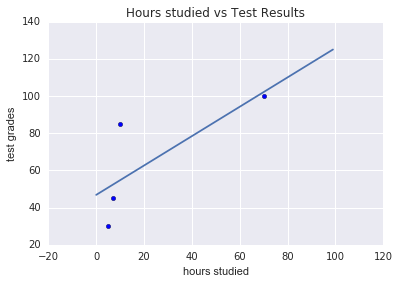

In [71]:
import matplotlib.pyplot as plt
%pylab inline

plt.scatter(time_studied_actual, test_grades_actual )
plt.plot(x_predict,predicted_values)
plt.ylabel('test grades')
plt.xlabel('hours studied')
plt.title('Hours studied vs Test Results')




**Question 4**  

In the table `utils` (in RDS) are the average utility bills for homes of a particular size (Y) and the average monthly temperature (X).  

(a) Make a scatter plot of the data.  

In [73]:
%pylab inline

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yaml

from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

utility_df = pd.read_sql("SELECT * FROM utils WHERE utils IS NOT NULL;", engine)

Populating the interactive namespace from numpy and matplotlib


In [75]:
utility_df.head()
#y = bill
#x = temp

,month,bill,temp
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69


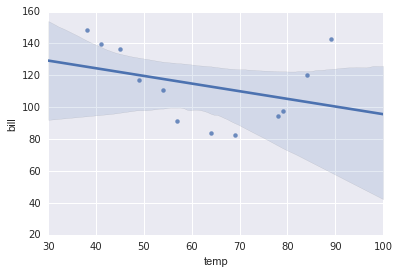

In [80]:
import seaborn as sns

sns.regplot('temp','bill',data=utility_df);

(b) Does it appear from inspection that there is a relationship between the variables? Why or why not?  

In [78]:
# There does appear to be a relationship, but this relationship appears to be non-linear (quadratic)

(c) Calculate the least squares line.  

In [81]:
#y = bill
#x = temp
X = utility_df.temp
X = sm.add_constant(X)
y = utility_df.bill

model = sm.OLS(y, X)
results = model.fit()
results.summary()

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   bill   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.416
Date:                Mon, 03 Oct 2016   Prob (F-statistic):              0.261
Time:                        16:10:20   Log-Likelihood:                -53.778
No. Observations:                  12   AIC:                             111.6
Df Residuals:                      10   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        143.6228     25.995      5.525      0.000        85.701   201.544
temp          -0.4799      0.403     -1.190      0.261        -1.378     0.419
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.588
Skew:                           0.272   Prob(JB):                        0.745
Kurtosis:                       2.062   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
results.params

const    143.622805
temp      -0.479884
dtype: float64

# $\hat{predicted-bill} = 143.62 - .48*(temp)$

(d) Calculate and interpret the value of $R^2$.  

# Our R^2 value is .124 which means that 12.4% of the variance in bill size is predicted by temperature.

(e) Interpret the intercept and slope coefficients.  

# If the temperature is zero ( you're going to use a lot of heat!) the predicted bill size is 143.62. For every degree that temperature increases, your bill size will decrease by .48 cents. 

(f) What is the 95% confidence interval for the slope?  

# Our 95% confidence interval for the slope is [-1.378, 0.419]. 

(g) Is the average monthly temperature a significant predictor of the average utility bill? Why or why not?  

# The average monthly temperature is NOT a significant predictor of the average utility bill because 1) 0 is contained in our 95% confidence interval for the coefficient of temperature and 2) The p-value for our slope coefficient is much greater than .05.

(e) Use the least squares line to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not? 

In [83]:
def bill(temp): return (143.62 -.48*(temp))

In [84]:
bill(120)

86.02000000000001

# This is not a reasonable answer because 1) Our R^2 value is very low and 2) The shape our our function is quadratic, and is therefore not well described by a linear relationship.